In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:

# Locate CSVs in resources in folder
net_overseas_migration_larger_states = Path("Resources/Graph 5.1 Net overseas migration(a) - larger states(b) - year ending.csv")
net_overseas_migration_smaller_states = Path("Resources/Graph 5.2 Net overseas migration(a) - smaller states and territories(b) - year ending.csv")

# Load CSV files into DataFrames and remove the first rows (as not relevant data)
df_larger_states_migration = pd.read_csv(net_overseas_migration_larger_states, skiprows=1)
df_smaller_states_migration = pd.read_csv(net_overseas_migration_smaller_states, skiprows=1)

# Merge into one migration dataframe
merged_df_migration = pd.merge(df_larger_states_migration, df_smaller_states_migration, on='Quarter')

#Display migration dataframe
merged_df_migration

# Remove rows with no values 
merged_df_migration = merged_df_migration.dropna(subset=['Quarter'])

# Remove non-date values 
merged_df_migration = merged_df_migration[merged_df_migration['Quarter'].str.match(r'[A-Za-z]{3}-\d{2}')]

# Convert the Quarter column to datetime format (to enable filtering) 
merged_df_migration['Quarter'] = pd.to_datetime(merged_df_migration['Quarter'], format='%b-%y')

# Filter to remove data after December 2021 
merged_df_migration = merged_df_migration[merged_df_migration['Quarter'] <= pd.to_datetime('Dec-21', format='%b-%y')]

# Convert the Quarter column back to original format (for cleaner visualisation)
merged_df_migration['Quarter'] = merged_df_migration['Quarter'].dt.strftime('%b-%y')

#Display cleaned merged migration dataframe
merged_df_migration.head(3)

,Quarter,NSW ('000),Vic. ('000),Qld ('000),WA ('000),SA ('000),Tas. ('000),NT ('000),ACT ('000)
0,Jun-13,66.76,59.03,41.83,42.14,11.68,1.61,4.35,2.92
1,Sep-13,68.86,59.51,37.24,35.35,11.97,1.82,3.68,2.77
2,Dec-13,67.58,58.50,33.46,29.06,12.13,1.79,3.19,2.65


In [3]:

# Convert to percentage movement per quarter
for column in merged_df_migration.columns[1:]:  
    merged_df_migration[column + ' Variation'] = round(merged_df_migration[column].pct_change() * 100,2)
    
# Update first row from 'NaN' to display zero
merged_df_migration.fillna(0, inplace=True)


In [4]:

#Display cleaned merged migration dataframe
merged_df_migration

,Quarter,NSW ('000),Vic. ('000),Qld ('000),WA ('000),SA ('000),Tas. ('000),NT ('000),ACT ('000),NSW ('000) Variation,Vic. ('000) Variation,Qld ('000) Variation,WA ('000) Variation,SA ('000) Variation,Tas. ('000) Variation,NT ('000) Variation,ACT ('000) Variation
0,Jun-13,66.76,59.03,41.83,42.14,11.68,1.61,4.35,2.92,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Sep-13,68.86,59.51,37.24,35.35,11.97,1.82,3.68,2.77,3.15,0.81,-10.97,-16.11,2.48,13.04,-15.40,-5.14
2,Dec-13,67.58,58.50,33.46,29.06,12.13,1.79,3.19,2.65,-1.86,-1.70,-10.15,-17.79,1.34,-1.65,-13.32,-4.33
3,Mar-14,68.68,59.18,30.97,23.87,12.21,1.82,2.67,2.80,1.63,1.16,-7.44,-17.86,0.66,1.68,-16.30,5.66
4,Jun-14,66.99,56.91,27.22,18.75,11.64,1.80,1.75,2.72,-2.46,-3.84,-12.11,-21.45,-4.67,-1.10,-34.46,-2.86
5,Sep-14,67.67,57.64,24.70,16.39,11.06,1.66,1.56,3.06,1.02,1.28,-9.26,-12.59,-4.98,-7.78,-10.86,12.50
6,Dec-14,68.35,58.39,23.03,15.51,10.97,1.73,1.14,3.21,1.00,1.30,-6.76,-5.37,-0.81,4.22,-26.92,4.90
7,Mar-15,69.44,58.93,21.26,13.99,11.21,1.74,1.21,3.31,1.59,0.92,-7.69,-9.80,2.19,0.58,6.14,3.12
8,Jun-15,70.31,60.69,20.43,14.07,11.15,1.52,2.35,3.50,1.25,2.99,-3.90,0.57,-0.54,-12.64,94.21,5.74
9,Sep-15,71.48,61.96,19.29,13.44,11.29,1.63,1.83,3.30,1.66,2.09,-5.58,-4.48,1.26,7.24,-22.13,-5.71


In [5]:
# Slice the migration dataframe to perform calculations for the Summary Statistics
reduced_migration_df = merged_df_migration[["NSW ('000)", "Vic. ('000)", "Qld ('000)", "WA ('000)",
       "SA ('000)", "Tas. ('000)", "NT ('000)", "ACT ('000)"]]

# Display the sliced dataframe
reduced_migration_df.head(2)

,NSW ('000),Vic. ('000),Qld ('000),WA ('000),SA ('000),Tas. ('000),NT ('000),ACT ('000)
0,66.76,59.03,41.83,42.14,11.68,1.61,4.35,2.92
1,68.86,59.51,37.24,35.35,11.97,1.82,3.68,2.77


In [6]:
# Convert the columns names into a list to be used in the plots
states = ['NSW','VIC','QLD','WA','SA','TAS','NT','ACT']

# Create list containers to store the calculations
migration_average_list = []
migration_median_list = []
migration_variance_list = []
migration_stddev_list = []
migration_max_list = []
migration_min_list = []
net_migration_list = []

# Create a loop through the columns from the reduced_property_df to make the calculations
for columns in reduced_migration_df:
    # calculate the mean for the column
    migration_mean = round(reduced_migration_df[columns].mean(),2)
    # append the calculated mean into the container
    migration_average_list.append(migration_mean)
    # calculate the median for the column
    migration_median = round(reduced_migration_df[columns].median(),2)
    # append the calculated median into the container
    migration_median_list.append(migration_median)
    # calculate the variance for the column
    migration_variance = round(reduced_migration_df[columns].var(),2)
    # append the calculated variance into the container
    migration_variance_list.append(migration_variance)
    # calculate the standard deviation for the column
    migration_std_dev = round(reduced_migration_df[columns].std(),2)
    # append the calculated standard deviation into the container
    migration_stddev_list.append(migration_std_dev)
    # find the maximum value of the column
    migration_max = round(reduced_migration_df[columns].max(),2)
    # append the maximum value into the container
    migration_max_list.append(migration_max)
    # find the minimum value of the column
    migration_min = round(reduced_migration_df[columns].min(),2)
    # append the minimum value into the container
    migration_min_list.append(migration_min)
    # calculate the net migration across the timeframe of the dataset
    net_migration = reduced_migration_df[columns].sum()
    # append the net migration into the container
    net_migration_list.append(net_migration)


In [7]:
# Create a dataframe to summarise the statistics calculated for further analysis
summary_stats_migration_df = pd.DataFrame({'States':states,
                           'Average':migration_average_list,
                           'Median':migration_median_list,
                           'Variance':migration_variance_list,
                           'Standard Deviation':migration_stddev_list,
                           'Max': migration_max_list,
                           'Min': migration_min_list,
                           "Net Migration (2013-2021) ('000)": net_migration_list
                           })

In [8]:

# Display the summary statistics
summary_stats_migration_df

,States,Average,Median,Variance,Standard Deviation,Max,Min,Net Migration (2013-2021) ('000)
0,NSW,67.32,72.84,1058.30,32.53,105.50,-15.38,2356.35
1,VIC,57.03,64.19,1709.32,41.34,91.29,-52.99,1996.02
2,QLD,23.50,27.74,206.33,14.36,41.83,-15.19,822.49
3,WA,14.88,13.44,103.75,10.19,42.14,-5.43,520.77
4,SA,10.72,11.99,26.40,5.14,18.03,-3.26,375.28
5,TAS,2.08,1.82,1.10,1.05,4.00,-0.32,72.65
6,NT,1.33,1.14,1.10,1.05,4.35,-0.50,46.45
7,ACT,2.51,3.21,4.30,2.07,4.60,-3.15,87.75


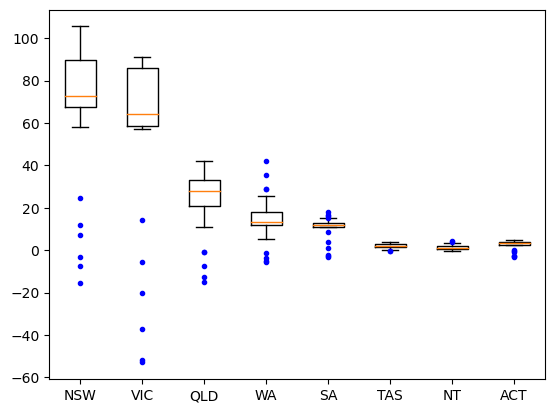

In [9]:
# Create a box plot chart with the data from the migration dataframe
plt.boxplot(reduced_migration_df, labels = states, sym = '.b')

plt.show()

In [10]:
# Locate CSVs in resources in folder
residential_property_price_indexes = Path("Resources/Residential Property Price Indexes, capital cities.csv")

#Load CSV file into DataFrame and remove the first row (as not relevant data)
df_property_price_indexes = pd.read_csv(residential_property_price_indexes, skiprows=1)

# Remove rows with no values 
df_property_price_indexes = df_property_price_indexes.dropna(subset=['Quarter'])

# Remove non-date values 
df_property_price_indexes = df_property_price_indexes[df_property_price_indexes['Quarter'].str.match(r'[A-Za-z]{3}-\d{2}')]

# Convert the Quarter column to datetime format (to enable filtering)
df_property_price_indexes['Quarter'] = pd.to_datetime(df_property_price_indexes['Quarter'], format='%b-%y')

# Filter to remove data pre June 2013 (to align data range with migration data)
df_property_price_indexes = df_property_price_indexes[df_property_price_indexes['Quarter'] >= pd.to_datetime('Jun-13', format='%b-%y')]

# Convert the Quarter column back to original format for cleaner visualisation
df_property_price_indexes['Quarter'] = df_property_price_indexes['Quarter'].dt.strftime('%b-%y')


In [11]:
# Reorganising the columns to align with the order of the migration data (swap Adelaide and Perth)
df_property_price_indexes = df_property_price_indexes[["Quarter", "Sydney", "Melbourne", "Brisbane", "Perth", "Adelaide", "Hobart", "Darwin", "Canberra"]]
df_property_price_indexes.head(2)

,Quarter,Sydney,Melbourne,Brisbane,Perth,Adelaide,Hobart,Darwin,Canberra
6,Jun-13,108.7,102.7,103.2,110.6,100.9,100.0,111.0,101.0
7,Sep-13,112.8,105.9,104.5,110.7,101.3,101.0,111.3,101.1


In [12]:
# Convert the indexes into percentage movement per quarter
for column in df_property_price_indexes.columns[1:]:  
    df_property_price_indexes[column + ' Variation'] = round(df_property_price_indexes[column].pct_change() * 100,2)
    
# Update first row from 'NaN' to display zero
df_property_price_indexes.fillna(0, inplace=True)

#Display cleaned dataframe
df_property_price_indexes.head()

,Quarter,Sydney,Melbourne,Brisbane,Perth,Adelaide,Hobart,Darwin,Canberra,Sydney Variation,Melbourne Variation,Brisbane Variation,Perth Variation,Adelaide Variation,Hobart Variation,Darwin Variation,Canberra Variation
6,Jun-13,108.7,102.7,103.2,110.6,100.9,100.0,111.0,101.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,Sep-13,112.8,105.9,104.5,110.7,101.3,101.0,111.3,101.1,3.77,3.12,1.26,0.09,0.40,1.00,0.27,0.10
8,Dec-13,119.0,109.7,107.1,113.9,104.4,103.3,112.8,101.8,5.50,3.59,2.49,2.89,3.06,2.28,1.35,0.69
9,Mar-14,121.7,110.7,108.5,114.8,105.4,103.7,114.0,102.3,2.27,0.91,1.31,0.79,0.96,0.39,1.06,0.49
10,Jun-14,126.0,112.1,110.5,114.8,105.6,104.1,114.7,103.3,3.53,1.26,1.84,0.00,0.19,0.39,0.61,0.98


In [13]:
# Slice the Property Dataframe to perform calculations for the Summary Statistics
reduced_property_df = df_property_price_indexes[['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide',
       'Hobart', 'Darwin', 'Canberra']]

# Display the sliced dataframe
reduced_property_df.head(2)


,Sydney,Melbourne,Brisbane,Perth,Adelaide,Hobart,Darwin,Canberra
6,108.7,102.7,103.2,110.6,100.9,100.0,111.0,101.0
7,112.8,105.9,104.5,110.7,101.3,101.0,111.3,101.1


In [14]:
# Convert the columns names into a list to be used in the plots
capitals = list(reduced_property_df.columns)

# Create list containers to store the calculations
property_prices_average_list = []
property_prices_median_list = []
property_prices_variance_list = []
property_prices_stddev_list = []
property_prices_max_list = []
property_prices_min_list = []
property_prices_total_variation = []

# Create a loop through the columns from the reduced_property_df to make the calculations
for columns in reduced_property_df:
    # calculate the mean for the column
    property_prices_mean = round(reduced_property_df[columns].mean(),2)
    # append the calculated mean into the container
    property_prices_average_list.append(property_prices_mean)
    # calculate the median for the column
    property_prices_median = round(reduced_property_df[columns].median(),2)
    # append the calculated median into the container
    property_prices_median_list.append(property_prices_median)
    # calculate the variance for the column
    property_prices_variance = round(reduced_property_df[columns].var(),2)
    # append the calculated variance into the container
    property_prices_variance_list.append(property_prices_variance)
    # calculate the standard deviation for the column
    property_prices_std_dev = round(reduced_property_df[columns].std(),2)
    # append the calculated standard deviation into the container
    property_prices_stddev_list.append(property_prices_std_dev)
    # find the maximum value of the column
    property_prices_max = round(reduced_property_df[columns].max(),2)
    # append the maximum value into the container
    property_prices_max_list.append(property_prices_max)
    # find the minimum value of the column
    property_prices_min = round(reduced_property_df[columns].min(),2)
    # append the minimum value into the container
    property_prices_min_list.append(property_prices_min)
    # fetch the data from the first quarter from the dataset
    property_prices_start = reduced_property_df.loc[reduced_property_df.index[0],columns]
    # fetch the data from the last quarter from the dataset
    property_prices_end = reduced_property_df.loc[reduced_property_df.index[-1],columns]
    # calculate the total variation from the first to the last measurement from the dataset
    property_prices_variation = round((property_prices_end - property_prices_start) / property_prices_start * 100, 2)
    # append the total variation calculated into the container
    property_prices_total_variation.append(property_prices_variation)


In [15]:
# Create a list with the capitals latitude and longitude coordinates
cap_latitude = [-33.8678, -37.8142 , -27.4678, -31.9559, -34.9275,-42.8806,-12.4381,-35.2931]
cap_longitude = [151.2100, 144.9631, 153.0281, 115.8606, 138.6000,147.3250,130.8411,149.1269]

In [16]:

# Create a dataframe to summarise the statistics calculated for further analysis
summary_stats_properties_df = pd.DataFrame({'Cities':capitals,
                           'Average':property_prices_average_list,
                           'Median':property_prices_median_list,
                           'Variance':property_prices_variance_list,
                           'Standard Deviation':property_prices_stddev_list,
                           'Max': property_prices_max_list,
                           'Min': property_prices_min_list,
                           'Total Variation (%)': property_prices_total_variation,
                           'Latitude':cap_latitude,
                           'Longitude':cap_longitude 
                           })

In [17]:
# Display the summary statistics
summary_stats_properties_df

,Cities,Average,Median,Variance,Standard Deviation,Max,Min,Total Variation (%),Latitude,Longitude
0,Sydney,158.91,160.5,622.74,24.95,218.7,108.7,101.20,-33.8678,151.2100
1,Melbourne,138.89,142.9,434.45,20.84,185.7,102.7,80.82,-37.8142,144.9631
2,Brisbane,121.75,121.7,146.15,12.09,164.9,103.2,59.79,-27.4678,153.0281
3,Perth,107.69,106.6,35.20,5.93,120.1,98.5,8.59,-31.9559,115.8606
4,Adelaide,117.82,118.7,140.69,11.86,156.3,100.9,54.91,-34.9275,138.6000
5,Hobart,133.72,129.0,864.63,29.40,211.1,100.0,111.10,-42.8806,147.3250
6,Darwin,100.86,100.1,94.07,9.70,114.7,86.9,-8.92,-12.4381,130.8411
7,Canberra,121.25,121.5,295.36,17.19,173.5,101.0,71.78,-35.2931,149.1269


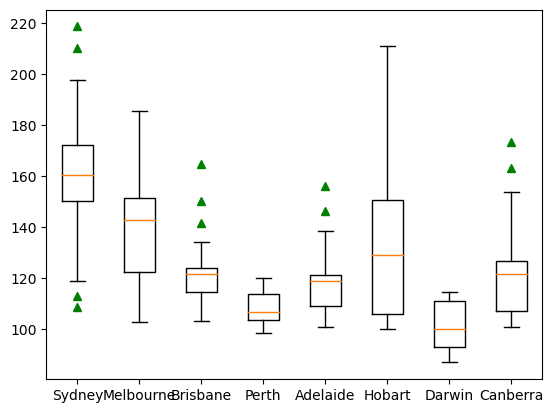

In [18]:
# Create a box plot chart with the data from the property prices dataframe
plt.boxplot(reduced_property_df, labels = capitals, sym = '^g')

plt.show()